In [138]:
# Importing the libraries for dataset handling

import pandas as pd
import numpy as np

# Reading the data set from csv file
df = pd.read_csv('./wine.csv', header = None)

In [139]:
# Checking the number of features and number of data records
print(df.shape)

(178, 14)


In [140]:
# Segregating target variable
y = df[0]
df.drop(df.columns[0], axis=1, inplace=True)

In [141]:
# Importing the normalizer and the column transformer for the data preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer

# Column Transformer is coded to normalize the columns that are of high values i.e out of the range of 0-10
ct = ColumnTransformer([("normalization", Normalizer(norm='l1'), [0,3,4,12])], remainder='passthrough')

# The columns are fitted and transformed for normalization
df = ct.fit_transform(df)

In [142]:
# Splitting the model in 80-20 scheme for training
from sklearn.model_selection import train_test_split

# The overall dataset is splitted into two sets of training and testing randomly
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20, random_state=5, stratify=y)

In [143]:
# Importing the classifier function and optimization function

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Defining the KNN classifier
knn = KNeighborsClassifier()

# Defining the range of possible values of k to try
k_range = list(range(1, X_train.shape[0]//2))

# Defining all the parameters to search through
param_grid = dict(n_neighbors=k_range)

# Defining the grid search 
# knn = classifier
# param_grid = parameters to search through
# cv = Cross validation (k-fold)
# scoring = Metrics for evaluation. "accuracy" means the classification accuracy
# return_train_score = No need to return train score
# Verbose = Amount of information during search
# n_jobs = How much processing to use for search. -1 means the maximum amount of available resources
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1, n_jobs=-1)

grid_search = grid.fit(X_train, y_train)

# Printing what the best parameter has been
print(grid_search.best_params_)

Fitting 10 folds for each of 70 candidates, totalling 700 fits
{'n_neighbors': 3}


In [144]:
# Definining a KNN classifier with the best params
neight = KNeighborsClassifier(3)

neight.fit(X_train,y_train)

# Predicitng with new classifier
y_pred = neight.predict(X_test)

In [145]:
# Checking the number of data records in each class

y_test.value_counts()

2    14
1    12
3    10
Name: 0, dtype: int64

Number of mislabeled points out of a total 36 points : 1


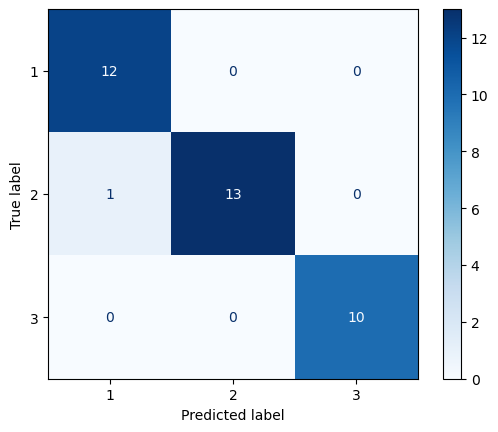

In [146]:
# Importing libraries for data visualization
from sklearn.metrics import classification_report, plot_confusion_matrix, multilabel_confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# classification_report, plot_confusion_matrix and multilabel_confusion_matrix gives us the confusion matrix

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

# Create a multi label confusion matrix MCM

# In multilabel confusion matrix MCM , the count of true negatives is MCM(0,0) , false negatives is MCM(1,0), true positives is MCM(1,1) and false positives is MCM(1,0).
cm = multilabel_confusion_matrix(y_test, y_pred, labels=[1,2,3])
disp = plot_confusion_matrix(neight, X_test, y_test,cmap=plt.cm.Blues)
plt.show()

In [147]:
# Displaying the calculated multi label confusion matrix
print(cm)

[[[23  1]
  [ 0 12]]

 [[22  0]
  [ 1 13]]

 [[26  0]
  [ 0 10]]]


In [148]:
# Calulating the specificity and the sensitivity of each of the classes
res = []
for l in [0,1,2]:
    x = cm[l]
    tn, fp = x[0]
    fn, tp = x[1]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    res.append([l,sensitivity, specificity])
    
print(pd.DataFrame(res,columns = ['class','sensitivity(Recall)','specificity']))

   class  sensitivity(Recall)  specificity
0      0             1.000000     0.958333
1      1             0.928571     1.000000
2      2             1.000000     1.000000


In [149]:
# Calculating the overall accuracy of the classifier
print("The Total Accuracy is ",  accuracy_score(y_test, y_pred))

The Total Accuracy is  0.9722222222222222
